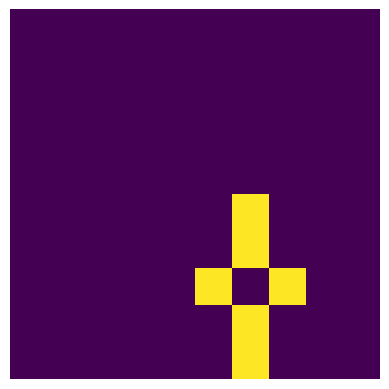

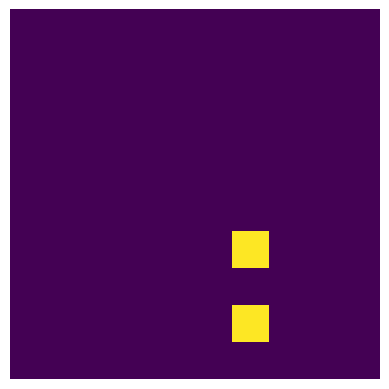

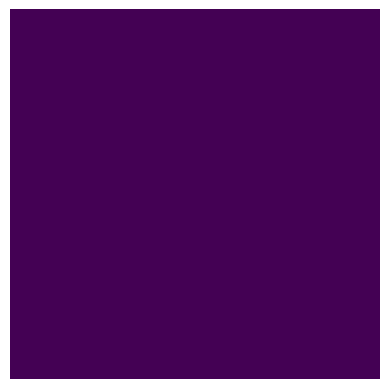

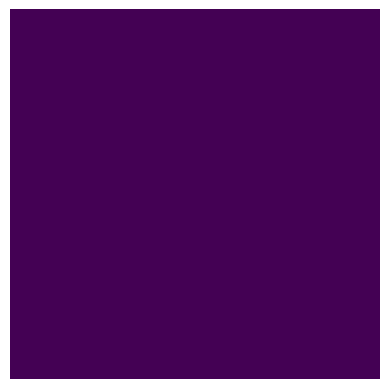

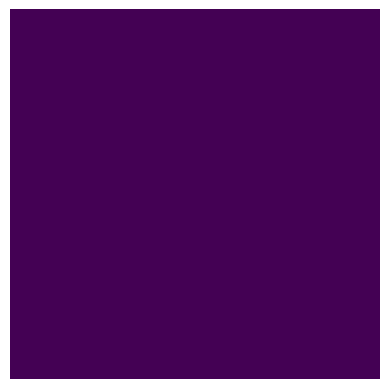

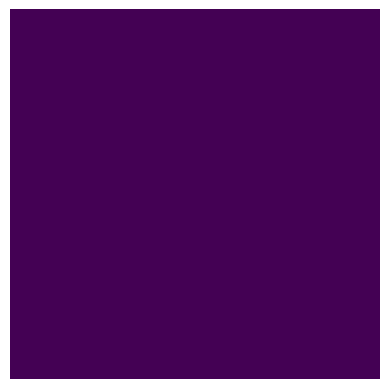

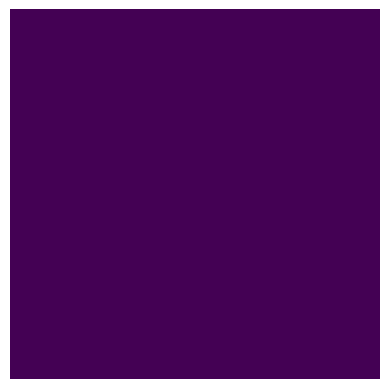

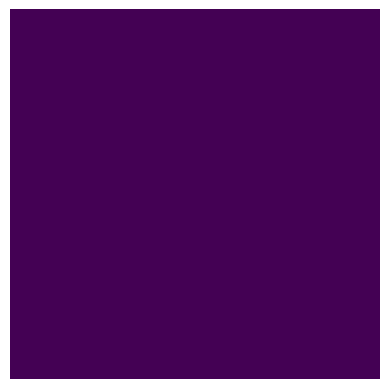

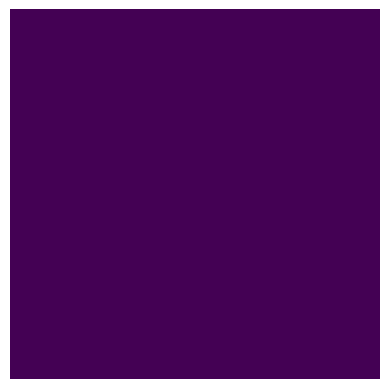

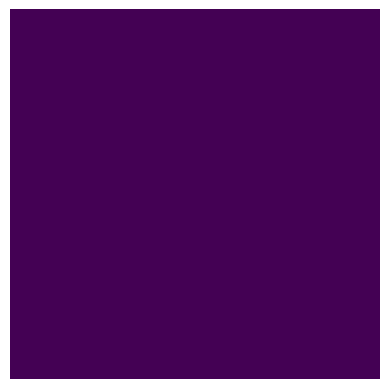

In [5]:
from ortools.linear_solver import pywraplp
import numpy as np
import matplotlib.pyplot as plt

n = 10
p = 0.2

c_x = np.random.randint(1, n-1)
c_y = np.random.randint(1, n-1)

I = []
for i in range(n):
    I.append([])
    for j in range(n):
        I[i].append(0)
        
for i in range(n):
    I[i][0] = np.random.binomial(1,p)
    
for j in range(n):
    I[0][j] = np.random.binomial(1,p)

for i in range(c_x-1, c_x+2):
    for j in range(c_y-1, c_y+2):
        I[i][j] = 1

"""plt.imshow(I)
plt.axis('off')
plt.show()"""

#solver = pywraplp.Solver.CreateSolver('SCIP')

J = []
for i in range(n):
    J.append([])
    for j in range(n):
        J[i].append(0)
        
for q in range(10):
    for i in range(n):
        for j in range(n):
            s = sum([I[a][b] for a in [i-1,i+1] for b in range(j-1, j+2) if a >= 0 and a < n and b >= 0 and b < n])
            if s == 3 or (I[i][j] == 1 and s == 4):
                J[i][j] = 1
            else:
                J[i][j] = 0
    for i in range(n):
        for j in range(n):
            I[i][j] = J[i][j]
    plt.imshow(I)
    plt.axis('off')
    plt.show()